<a href="https://colab.research.google.com/github/regret789/AI-Project/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Run this cell first in Google Colab
!pip install qiskit qiskit-machine-learning


In [4]:
from google.colab import files
uploaded = files.upload()



Saving Brain Tumor.csv to Brain Tumor.csv


In [ ]:
import pandas as pd

df = pd.read_csv('Brain Tumor.csv')
df.head()


In [5]:
# Importing standard Python libraries
import numpy as np                      # For numerical operations
import seaborn as sns                   # For data visualization
import pandas as pd                     # For data manipulation
import matplotlib.pyplot as plt         # For plotting graphs
import time                             # To handle time-based operations


# Importing key modules from scikit-learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler   # Data scaling
from sklearn import metrics                                       # For performance metrics
from sklearn.decomposition import PCA                             # Principal Component Analysis for dimensionality reduction
from sklearn.metrics import accuracy_score                        # For accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix  # Classification summary
from sklearn.model_selection import train_test_split              # Splitting data into training/testing
from sklearn.metrics import roc_curve                             # For ROC curve analysis

# Importing necessary quantum components from Qiskit Machine Learning
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap     # For creating quantum feature maps
from qiskit_machine_learning.kernels import FidelityQuantumKernel, FidelityStatevectorKernel   # Quantum kernel functions

# Qiskit Machine Learning Algorithms
# from qiskit_machine_learning.algorithms import PegasosQSVC     # Optional alternative to QSVC
from qiskit_machine_learning.algorithms import QSVC              # Quantum SVM classifier

# Quantum backend primitives
from qiskit.primitives import StatevectorSampler, Sampler        # Sampling circuits
from qiskit_machine_learning.state_fidelities import ComputeUncompute   # Fidelity computation

# Ignore warning messages (optional but recommended in demos)
import warnings
warnings.simplefilter(action='ignore')




In [6]:
# Read the uploaded CSV file
df = pd.read_csv("Brain Tumor.csv")



In [7]:
# Show all rows
#pd.set_option('display.max_rows', None)

# Show all columns#
#pd.set_option('display.max_columns', None)

# Show the full DataFrame
#df


In [8]:
df.head()


,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [9]:
y=df.iloc[:,1].values   #the values from the second column (index 1), presumably the target variable or labels.
x=df.iloc[:,2:15].values #the values from columns 3 to 15 (index 2 to 14), presumably the features.
print(df.head())    # to see the first 5 rows of the whole DataFrame
print(x[:5])        # first 5 rows of feature values
print(y[:5])        # first 5 target values


    Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e

In [10]:
# 'x' contains the feature values extracted from columns 2 to 14 of the DataFrame as a NumPy array
print(x)


[[6.53533936e+000 6.19587845e+002 2.48915215e+001 ... 4.47334559e+000
  9.81938697e-001 7.45834073e-155]
 [8.74996948e+000 8.05957634e+002 2.83893930e+001 ... 3.22007157e+000
  9.88834396e-001 7.45834073e-155]
 [7.34109497e+000 1.14380822e+003 3.38202339e+001 ... 5.98179980e+000
  9.78013693e-001 7.45834073e-155]
 ...
 [1.80115204e+001 1.15158276e+003 3.39349785e+001 ... 5.10369972e+000
  9.52181237e-001 7.45834073e-155]
 [1.33304291e+001 9.45732779e+002 3.07527686e+001 ... 6.43978421e+000
  9.40898110e-001 7.45834073e-155]
 [6.11013794e+000 4.80884025e+002 2.19290680e+001 ... 6.78732909e+000
  9.38730786e-001 7.45834073e-155]]


In [11]:
# 'y' contains the target variable values extracted from column 1 of the DataFrame as a NumPy array
print(y)

[0 0 1 ... 0 0 0]


In [12]:
 # Get the number of rows and columns in the DataFrame
df.shape

(3762, 15)

In [13]:
# Print all column names in the DataFrame to understand its structure
print(df.columns)

# Group the DataFrame by the 'Class' column and count the number of samples in each class
df.groupby('Class').size()




Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')


,0
Class,
0,2079
1,1683


In [14]:

# Display concise summary of the DataFrame including:
# - Number of non-null entries per column
# - Data types of each column
# - Memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [15]:
df.isna()  #checking any missing value in dataset. If missing then give"True".

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3758,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3759,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3760,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isna().sum()    #sum of missing vale in dataset

,0
Image,0
Class,0
Mean,0
Variance,0
Standard Deviation,0
Entropy,0
Skewness,0
Kurtosis,0
Contrast,0
Energy,0


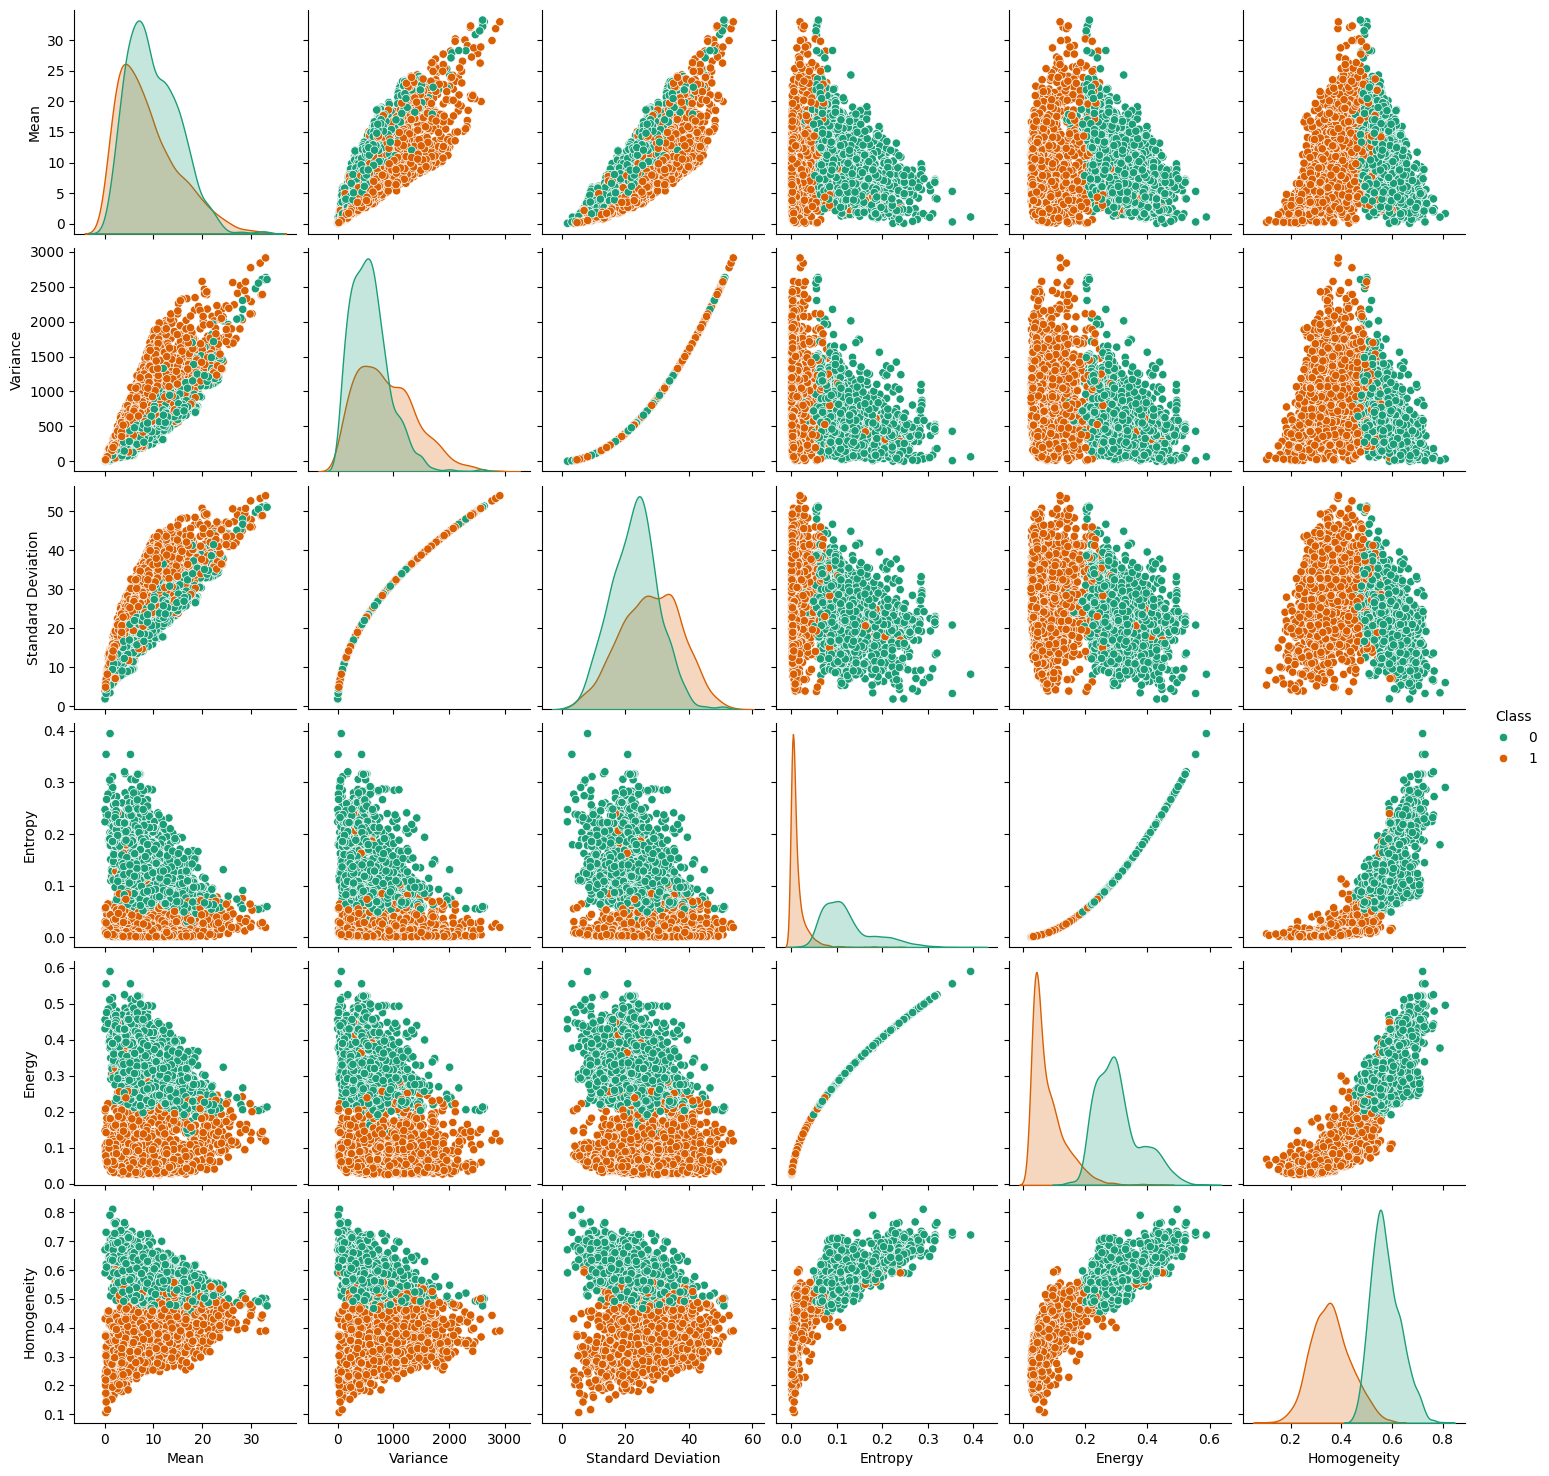

In [17]:
#visualisation of data
# Use the correct split syntax and column names
sns.pairplot(df[['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Energy', 'Homogeneity', 'Class']],
             hue='Class', palette='Dark2')

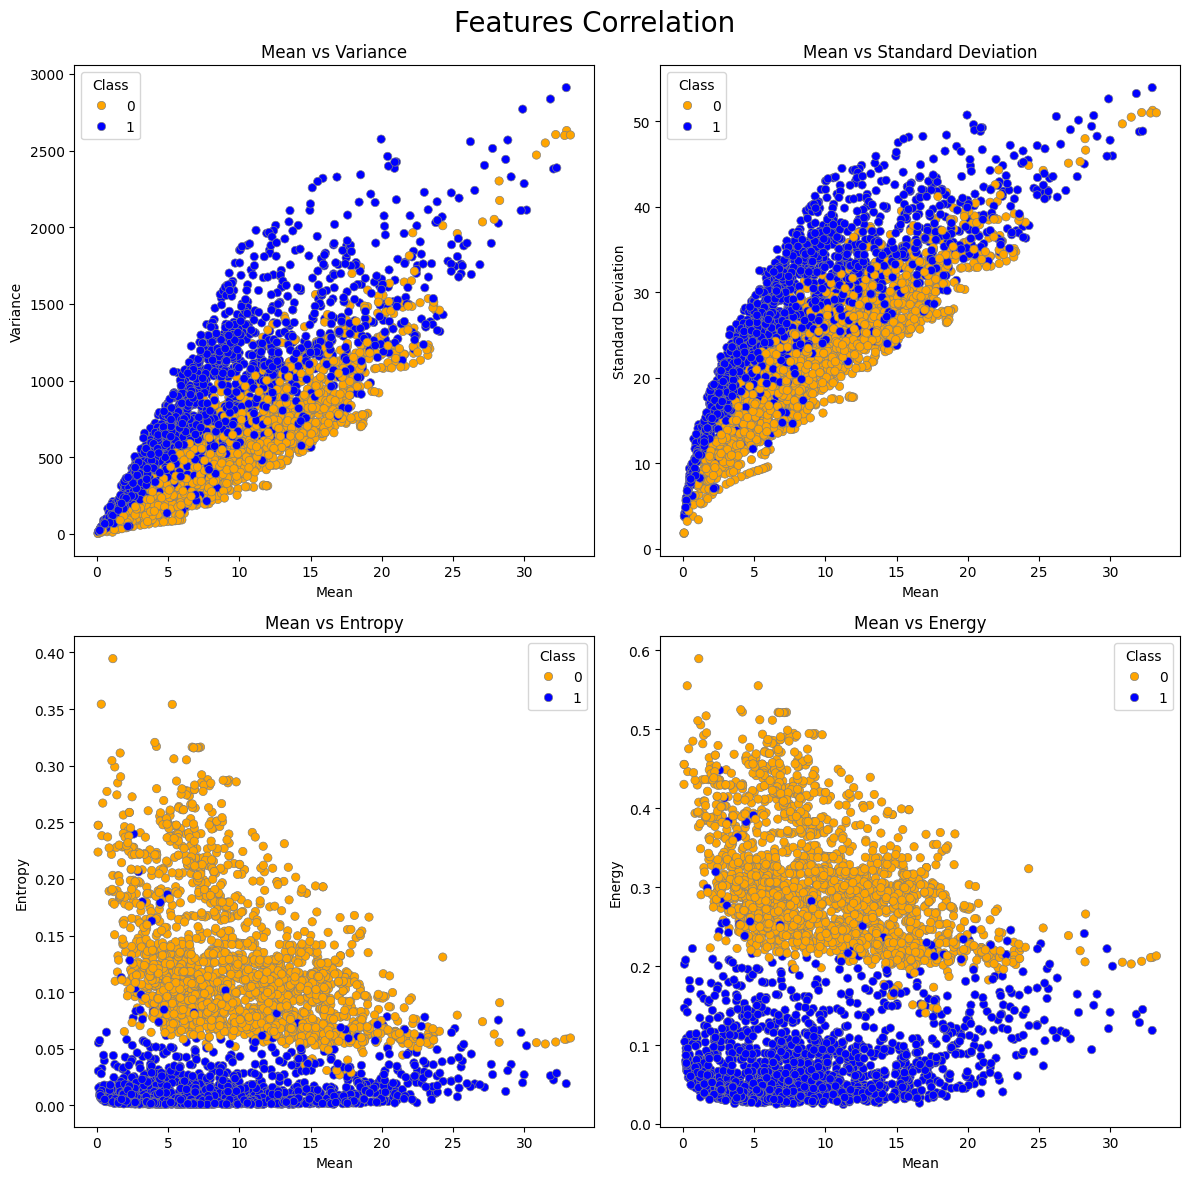

In [18]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette for the classes (e.g., 0 and 1)
palette = {0: 'orange', 1: 'blue'}
edgecolor = 'grey'

# Create a 2x2 grid of subplots with overall figure size
fig = plt.figure(figsize=(12, 12))

# Scatter Plot 1: Mean vs Variance
ax1 = plt.subplot(221)
sns.scatterplot(x=df['Mean'], y=df['Variance'], hue=df['Class'],
                data=df, palette=palette, edgecolor=edgecolor)
plt.title('Mean vs Variance')

# Scatter Plot 2: Mean vs Standard Deviation
ax2 = plt.subplot(222)
sns.scatterplot(x=df['Mean'], y=df['Standard Deviation'], hue=df['Class'],
                data=df, palette=palette, edgecolor=edgecolor)
plt.title('Mean vs Standard Deviation')

# Scatter Plot 3: Mean vs Entropy
ax3 = plt.subplot(223)
sns.scatterplot(x=df['Mean'], y=df['Entropy'], hue=df['Class'],
                data=df, palette=palette, edgecolor=edgecolor)
plt.title('Mean vs Entropy')

# Scatter Plot 4: Mean vs Energy
ax4 = plt.subplot(224)
sns.scatterplot(x=df['Mean'], y=df['Energy'], hue=df['Class'],
                data=df, palette=palette, edgecolor=edgecolor)
plt.title('Mean vs Energy')

# Set the overall title for all subplots
fig.suptitle("Features Correlation", fontsize=20)

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()


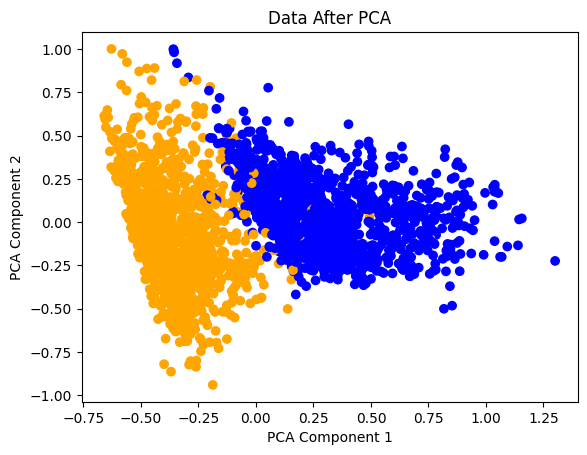

In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scaling the data using MinMaxScaler to bring features in the range [0, 1]
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Combine train and test for consistent scaling
samples = np.append(x_train, x_test, axis=0)
minmax_scaler = MinMaxScaler((0, 1)).fit(samples)

# Transform training and test data
x_train = minmax_scaler.transform(x_train)
x_test = minmax_scaler.transform(x_test)

# Apply PCA (Principal Component Analysis) to reduce feature dimensions
from sklearn.decomposition import PCA

# Reduce features to 2 components for visualization or quantum model input
pca = PCA(n_components=2).fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

# Visualize the data after PCA transformation
import matplotlib.pyplot as plt

# Plot the transformed training data colored by class
plt.scatter(x_train[:, 0], x_train[:, 1],
            c=['orange' if y == 1 else 'blue' for y in y_train])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data After PCA')
plt.show()


In [20]:
# Import required modules from Qiskit Machine Learning
from qiskit_machine_learning.kernels import FidelityStatevectorKernel
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC

import time

# Number of qubits = number of features after PCA (which is 2)
num_qubits = 2

# Create a quantum feature map (using ZZFeatureMap)
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2)

# Optionally, you could use Sampler-based kernel (commented in screenshot)
# from qiskit.primitives import Sampler
# sampler = Sampler()
# from qiskit_machine_learning.kernels import Fidelity
# qkernel = Fidelity(sampler=sampler, feature_map=feature_map)

# Create a fidelity-based statevector kernel (used here)
qkernel = FidelityStatevectorKernel(feature_map=feature_map)

# Instantiate the Quantum Support Vector Classifier (QSVC) with the quantum kernel
qsvc = QSVC(quantum_kernel=qkernel)

# Start timer
start_time = time.time()

# Train the QSVC on training data
qsvc.fit(x_train, y_train)

# Evaluate model performance on test data
score = qsvc.score(x_test, y_test)

# End timer and calculate execution time
end_time = time.time()
execution_time = end_time - start_time

# Print test accuracy and execution time
print("QSVC Classification test score:", score)
print("Execution Time:", execution_time)


QSVC Classification test score: 0.9503985828166519
Execution Time: 94.04180717468262


In [21]:
from sklearn import metrics

# Get true labels and predicted labels
expected_y = y_test
predicted_y = qsvc.predict(x_test)  # Use the trained QSVC model (qsvc)

# Print classification report
print("Classification Report:\n", metrics.classification_report(expected_y, predicted_y))

# (Optional) Print confusion matrix
print("Confusion Matrix:\n", metrics.confusion_matrix(expected_y, predicted_y))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       632
           1       0.97      0.92      0.94       497

    accuracy                           0.95      1129
   macro avg       0.95      0.95      0.95      1129
weighted avg       0.95      0.95      0.95      1129

Confusion Matrix:
 [[618  14]
 [ 42 455]]


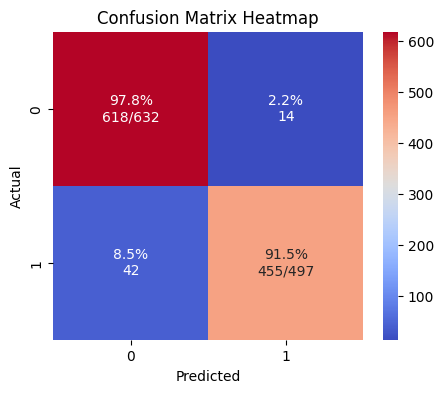

In [23]:

# Define function to plot annotated confusion matrix
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(5, 4)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]

    cm = metrics.confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100

    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape

    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            s = cm_sum[i][0] if cm_sum[i][0] != 0 else 1
            if i == j:
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    return cm_df, annot

# Generate annotated confusion matrix
cm, annot = cm_analysis(expected_y, predicted_y, labels=[0, 1])

# Plot the annotated heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=annot, fmt='', cmap='coolwarm', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


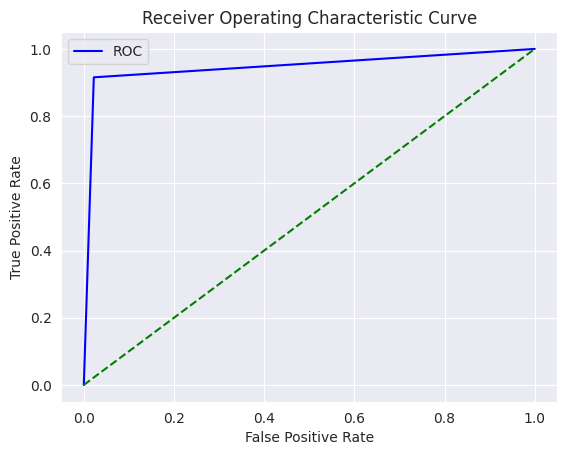

In [24]:
from sklearn.metrics import roc_curve

# Set seaborn style
sns.set_style("darkgrid")

# Define function to plot ROC curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

# Get ROC values
fper, tper, thresholds = roc_curve(expected_y, predicted_y)

# Call function to plot
plot_roc_curve(fper, tper)
